# Decaimiento radioactivo
__Rosas Avila José Daniel__

Notebook creado para la simulación del decaimiento radioactivo

$$
    \frac{dy(t)}{dt} = -\lambda y(t) \quad  0 < t < T_{max}\\
    y(0) = y_0
$$

 ## Forward & Backward Euler Method
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mesh (a, b, Nt ):
    ht = (b-a) / Nt
    return ht
def exactSolution (t, y0 , lam ):
    return y0 * np. exp (- lam * t)
def forwardEuler (y, ht , lam ):
    A = 1 - ht* lam
    An = [A]
    for i, val in enumerate (y [0: -1]):
        y[i +1] = A * y[i]
        An. append (An[i] * A)
    return y,An
def backwardEuler (y, ht , lam ):
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y [0: -1]):
        y[i +1] = B * y[i]
        Bn. append (Bn[i] * B)
    return y,Bn

def plot_results(yForwardEuler,yBackwardEuler,t,y_exac_p,tl,y_exacta,λ,A,B):
    cadena="$\lambda$={}, Nt = {}, $h_t$ = {}, Error: FE= {:.5f} BE = {:.5f}".format(λ,len(t)-1,t[1]-t[0],\
                                                                         np. linalg . norm (yForwardEuler- y_exac_p ,2),\
                                                                        np. linalg . norm (yBackwardEuler - y_exac_p ,2))
    fig,ax=plt.subplots(2,1,figsize=(15,8))
    ax[0].plot(tl,y_exacta,label="Solucion exacta")
    ax[0].plot(t,yForwardEuler,'o-',label="Forward Euler")
    ax[0].plot(t,yBackwardEuler,'s-',label="Backward Euler")
    ax[0].set_title(cadena)
    ax[0].legend()
    
    ax[1].plot(A,label="A")
    ax[1].plot(B,label="B")
    ax[1].legend()
    

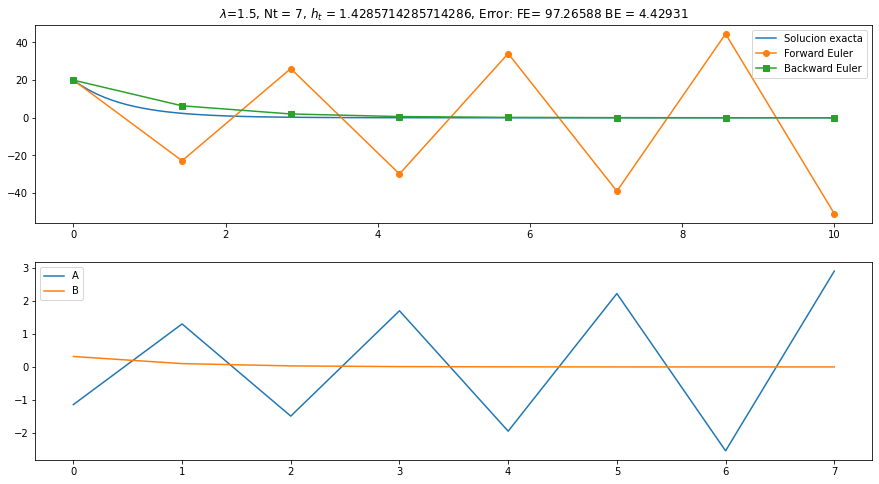

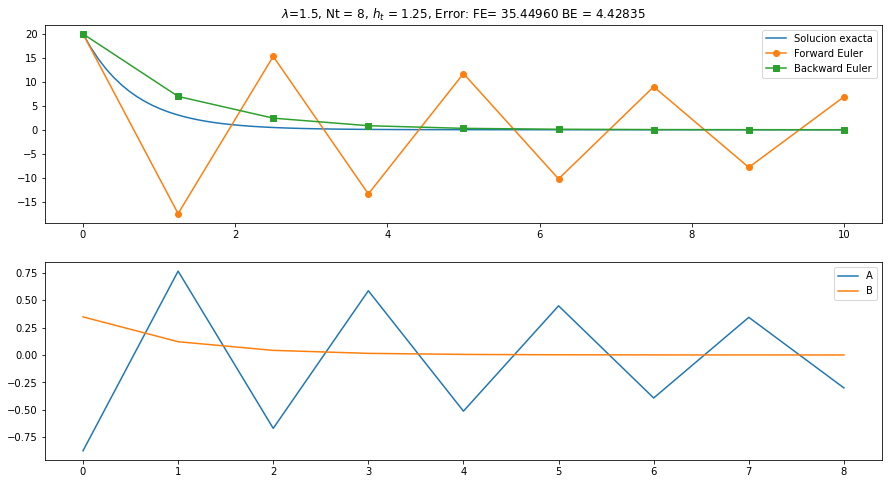

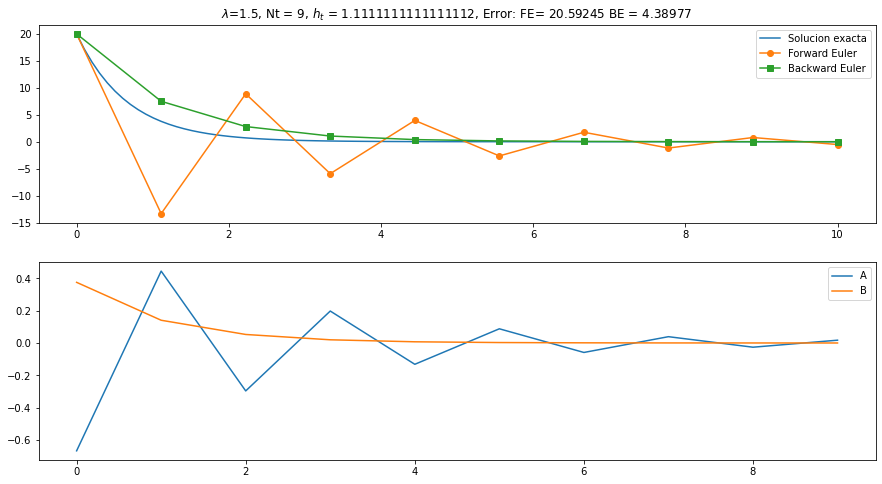

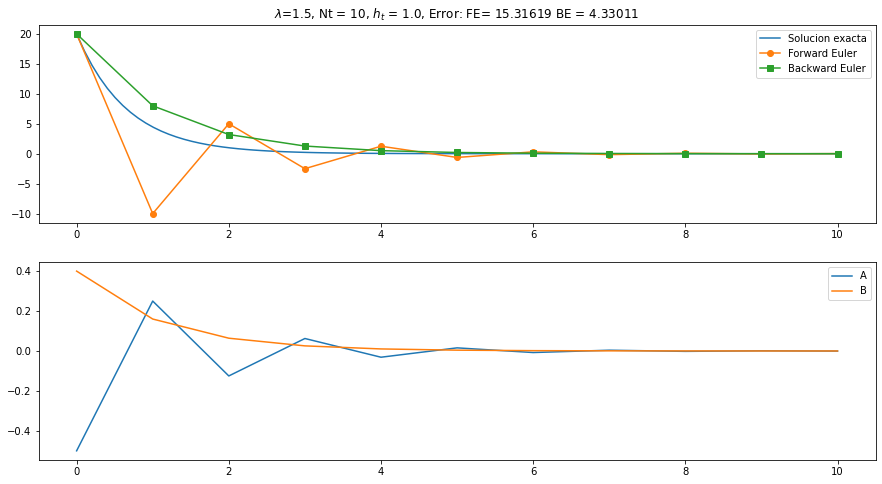

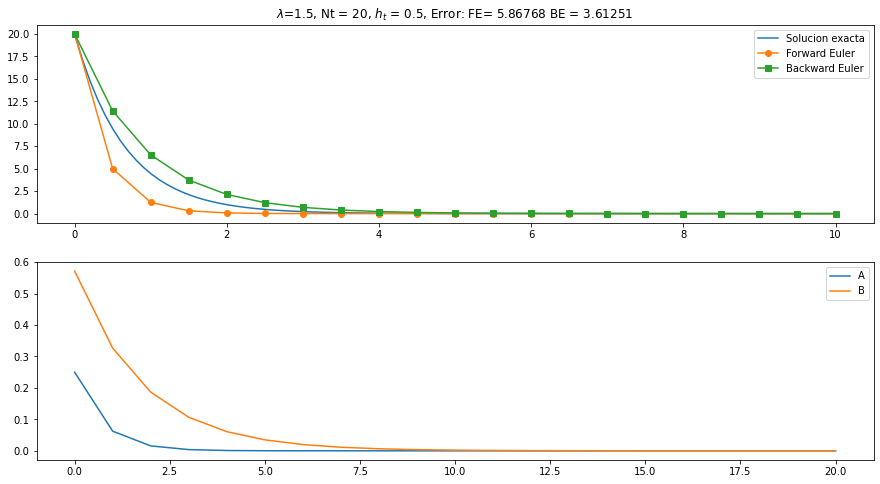

In [3]:
Nt_array=np.array([7,8,9,10,20])

for Nt in Nt_array:
    Tmax = 10 #Tiempo maximo
    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    y0 = 20 #valor inicial
    lam = 1.5 #valor de lambda
    t = np. linspace (0, Tmax , Nt +1) #Vector de tiempo 
    yf = np. zeros (Nt +1) #vector auxiliar para forward euler
    yb = np. zeros (Nt +1)  #vector auxiliar para backward euler
    yf [0] = y0 
    yb [0] = y0
    yf,A = forwardEuler (yf , ht , lam )
    yb,B = backwardEuler (yb , ht , lam )
    tl = np. linspace (0, Tmax , 100)
    y_exacta = exactSolution (tl , y0 , lam ) #solucion exacta con mushos puntos
    y_exac_p = exactSolution (t, y0 , lam) # solucion exacta con puntos igual a los definidos
    plot_results(yf,yb,t,y_exac_p,tl,y_exacta,lam,A,B)

 ### ¿Cuantos puntos se necesitan para que el error sea menor que 1.0 en cada metodo?


In [4]:
y0 = 20 #valor inicia
lam = 1.5 #valor de lambda
Tmax = 10 #Tiempo maximo

__Para Forward Euler__

Numero de puntos necesarios para que el error sea menor a 1 Nt = 384
Error FE= 0.9997001143283035


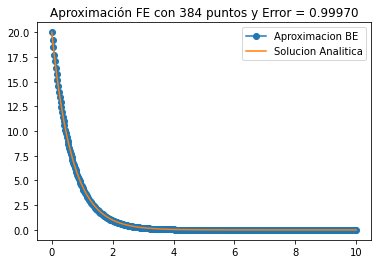

In [5]:
error_f=2
Nt=1
while error_f > 1:
    Nt+=1
    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    t = np. linspace (0, Tmax , Nt +1) #Vector de tiempo 
    yf = np. zeros (Nt +1) #vector auxiliar para forward euler
    yf [0] = y0 
    yf,A = forwardEuler (yf , ht , lam )
    y_exac_p = exactSolution (t, y0 , lam) # solucion exacta con puntos igual a los definidos
    error_f = np. linalg . norm (yf - y_exac_p ,2)
print("Numero de puntos necesarios para que el error sea menor a 1 Nt = {}".format(Nt))
print("Error FE= {}".format(error_f))
plt.plot(t,yf,'o-',label='Aproximacion BE')
plt.plot(t,y_exac_p,label='Solucion Analitica')
plt.legend()
plt.title("Aproximación FE con {} puntos y Error = {:.5f}".format(Nt,error_f));

__Para Backward Euler__

Numero de puntos necesarios para que el error sea menor a 1 Nt = 367
Error BE= 0.9990344971371202


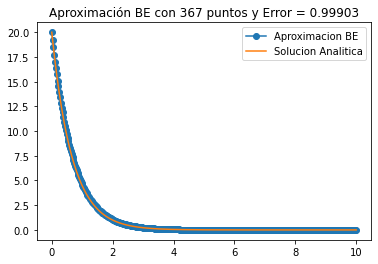

In [6]:
error_b=2
Nt=1
while error_b > 1:
    Nt+=1
    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    t = np. linspace (0, Tmax , Nt +1) #Vector de tiempo 
    yb = np. zeros (Nt +1) #vector auxiliar para forward euler
    yb [0] = y0
    yb,B = backwardEuler (yb , ht , lam )
    y_exac_p = exactSolution (t, y0 , lam) # solucion exacta con puntos igual a los definidos
    error_b = np. linalg . norm (yb - y_exac_p ,2)
print("Numero de puntos necesarios para que el error sea menor a 1 Nt = {}".format(Nt))
print("Error BE= {}".format(error_b))
plt.plot(t,yb,'o-',label='Aproximacion BE')
plt.plot(t,y_exac_p,label='Solucion Analitica')
plt.legend()
plt.title("Aproximación BE con {} puntos y Error = {:.5f}".format(Nt,error_b));

Ahora use $\lambda$ = 2 y conteste lo siguiente:

1. Para que valor de Nt el metodo FE converge?

2. Para que valor de Nt el metodo FE deja de oscilar?



La convergencia del método FE puede determinarse a partir del valor 
$$
A=1-h_t\lambda
$$
Si $\lvert A \rvert > 1 $ el método puede no converger por lo cual es necesario que se cumplan dos condiciones
$$
h_t\lambda > 0\quad y \quad h_t\lambda < 2
$$
Como $h_t\lambda$ siempre sera > 0 solo debemos cumplir la segunda condicion la cual para este caso se reduce a $h_t < 1 $

Numero de puntos mínimos con lo cual el método es estable Nt =11
ht = 0.9090909090909091


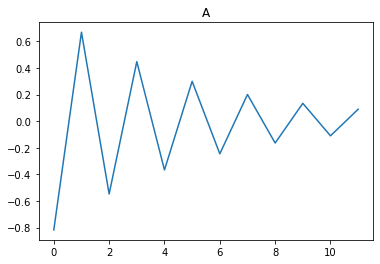

In [7]:
lam=2
Tmax = 10 #Tiempo maximo
for Nt in range(1,100):

    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    yf = np. zeros (Nt +1) #vector auxiliar para forward euler
    yf [0] = y0 
    yf,A = forwardEuler (yf , ht , lam )
    if ht < 1 :
        print("Numero de puntos mínimos con lo cual el método es estable Nt ={}".format(Nt))
        print("ht = {}".format(ht))
        plt.plot(A)
        plt.title("A")
 
        break

El valor mínimo para que la solucion deje de oscilar se da cuando se cumple 
$$
    1-h_t\lambda=0
$$
lo cual para este caso $h_t = 0.5$ lo cual se cumple cuando $N_t=20$

0.5 0.0


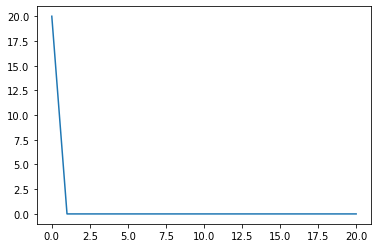

In [8]:
lam=2
Tmax = 10 #Tiempo maximo
Nt=20
ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
yf = np. zeros (Nt +1) #vector auxiliar para forward euler
yf [0] = y0 
yf,A = forwardEuler (yf , ht , lam )
plt.plot(yf)
print(ht,1-ht*lam)

3. Para que valor de Nt el metodo BE tiene un error menor a 3.0?

4. Para que valor de Nt el metodo FE tiene un error menor a 3.0?

Numero de puntos necesarios para que el error sea menor a 3 Nt = 45
Error BE= 2.975483770856007


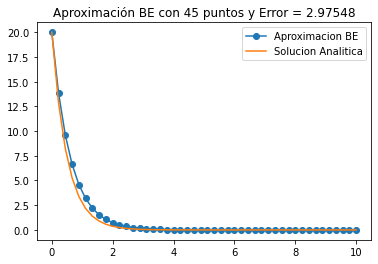

In [9]:
lam=2
Tmax = 10 #Tiempo maximo
y0=20
error_b=5
Nt=4
while error_b > 3:
    
    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    t = np. linspace (0, Tmax , Nt +1) #Vector de tiempo 
    yb = np. zeros (Nt +1) #vector auxiliar para forward euler
    yb [0] = y0
    yb,B = backwardEuler (yb , ht , lam )
    y_exac_p = exactSolution (t, y0 , lam) # solucion exacta con puntos igual a los definidos
    error_b = np. linalg . norm (yb - y_exac_p ,2)
    Nt+=1
print("Numero de puntos necesarios para que el error sea menor a 3 Nt = {}".format(Nt-1))
print("Error BE= {}".format(error_b))
plt.plot(t,yb,'o-',label='Aproximacion BE')
plt.plot(t,y_exac_p,label='Solucion Analitica')
plt.legend()
plt.title("Aproximación BE con {} puntos y Error = {:.5f}".format(Nt-1,error_b));

Numero de puntos necesarios para que el error sea menor a 3 Nt = 68
Error FE= 2.9862483610387875


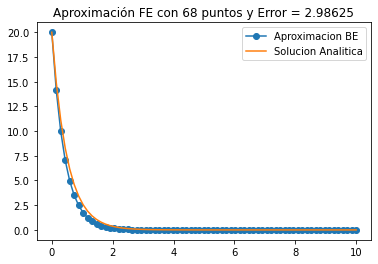

In [10]:
lam=2
Tmax = 10 #Tiempo maximo
error_f=5
Nt=5
y0=20
while error_f > 3:
    ht = mesh (0, Tmax , Nt) #tamaño de paso en tiempo
    t = np. linspace (0, Tmax , Nt +1) #Vector de tiempo 
    yf = np. zeros (Nt +1) #vector auxiliar para forward euler
    yf [0] = y0 
    yf,A = forwardEuler (yf , ht , lam )
    y_exac_p = exactSolution (t, y0 , lam) # solucion exacta con puntos igual a los definidos
    error_f = np. linalg . norm (yf - y_exac_p ,2)
    Nt+=1

print("Numero de puntos necesarios para que el error sea menor a 3 Nt = {}".format(Nt-1))
print("Error FE= {}".format(error_f))
plt.plot(t,yf,'o-',label='Aproximacion BE')
plt.plot(t,y_exac_p,label='Solucion Analitica')
plt.legend()
plt.title("Aproximación FE con {} puntos y Error = {:.5f}".format(Nt-1,error_f));